#### challenge

Perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00331/

training data set: amazon_cells_labelled.txt
delimiter: sentence \t score \n

In [5]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\sentiment labelled sentences\amazon_cells_labelled.txt')
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw.columns = ['sentence', 'score']

In [6]:
amazon_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
amazon_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
sentence    1000 non-null object
score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [10]:
keywords = ['good', 'great', 'wonderful', 'fantastic', 'love', 
            'excellent', 'value', 'problems', 'must have', 
            'wasted', 'impressed', 'recommend', 'loved', 'problem', 
            'best', 'helpful', 'hate', 'hated', 'poor', 'nice', 
            'disappointed', 'like', 'didn\'t like', 'sturdy', 
            'happy', 'complaints', 'drawback', 'comfortable', 
            'uncomfortable', 'not working', 'bargain', 'well', 
            'broke', 'super', 'beware', 'supposedly', 'beautiful', 
            'unhappy', 'winner', 'upset', 'damaged', 'failed',
            'waste', 'glad', 'limited', 'does not', 'flaw', 'flawed',
            'bad', 'useless', 'worst', 'horrible', 'pleased', 'excited',
            'mistake', 'do not', 'smell', 'incredible', 'unreliable',
            'helpful', 'junk', 'terrible', 'wise', 'lacking', 'money back',
            'sucks', 'worst', 'average', 'broke', 'defect', 'difficult',
            'rocks', 'frustrated', 'avoid', 'easy', 'nice', 'crashed',
            'sorry', 'joy']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_raw[str(key)] = amazon_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [12]:
amazon_raw['allcaps'] = amazon_raw.sentence.str.isupper()

In [13]:
amazon_raw['score'] = (amazon_raw['score'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

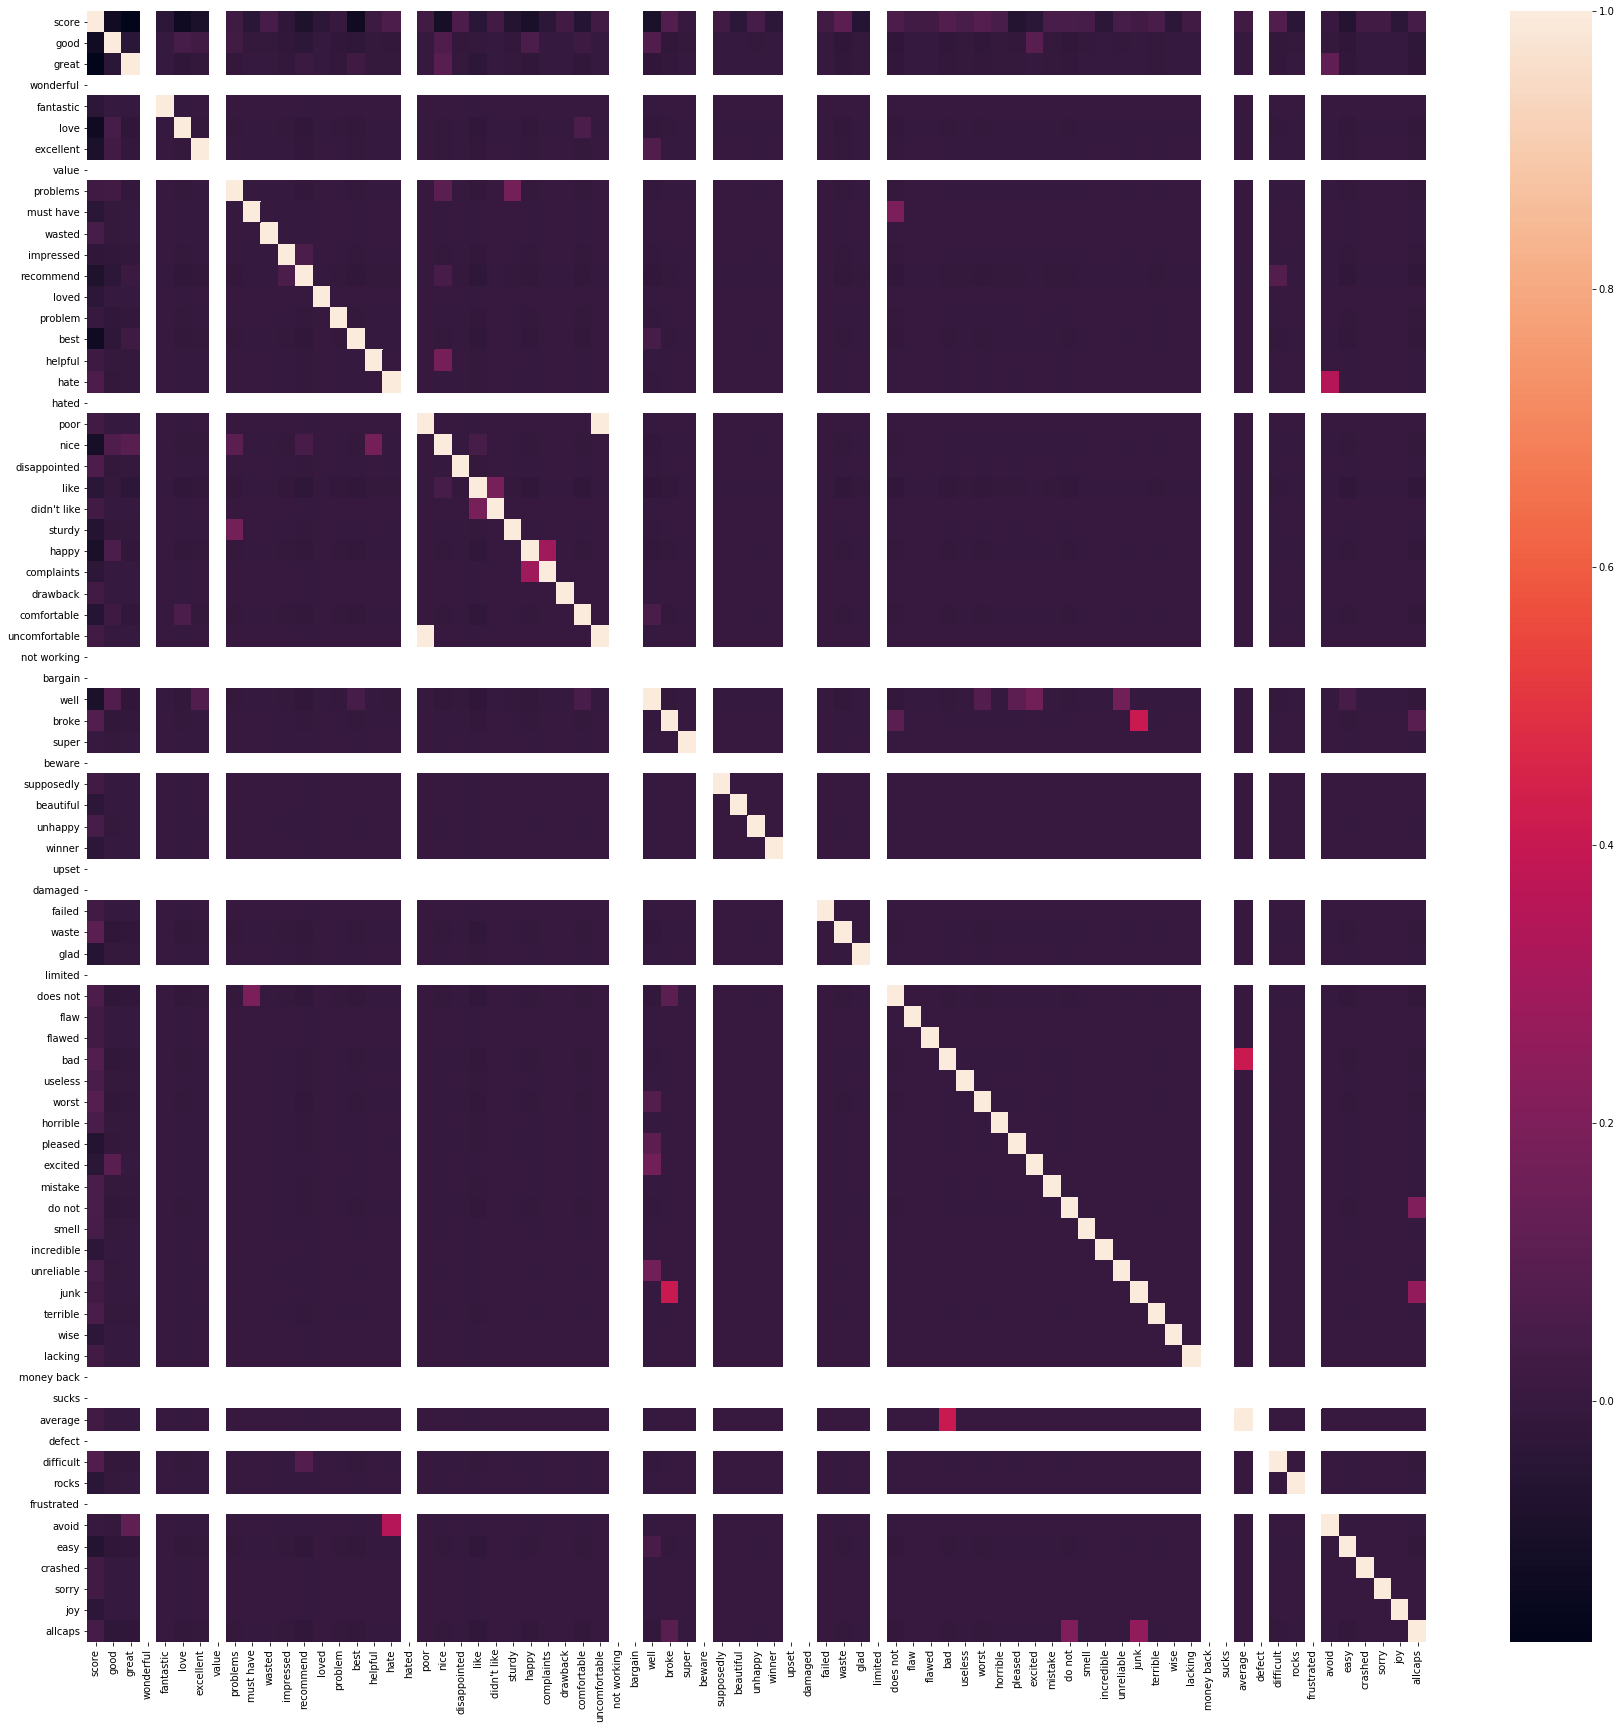

In [15]:
plt.figure(figsize=(30,30))
sns.heatmap(amazon_raw.corr())

In [16]:
data = amazon_raw[keywords + ['allcaps']]
target = amazon_raw['score']

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 333


In [18]:
#add column to pd of results
amazon_raw['predict'] = y_pred

In [19]:
amazon_raw.head()

,sentence,score,good,great,wonderful,fantastic,love,excellent,value,problems,...,difficult,rocks,frustrated,avoid,easy,crashed,sorry,joy,allcaps,predict
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,"Good case, Excellent value.",False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,The mic is great.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
data_path = (r'C:\Users\katec\Thinkful\data_collections\sentiment labelled sentences\yelp_labelled.txt')
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentence', 'score']

In [21]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [25]:
yelp_raw['allcaps'] = yelp_raw.sentence.str.isupper()

In [22]:
yelp_raw['score'] = (yelp_raw['score'] == 0)

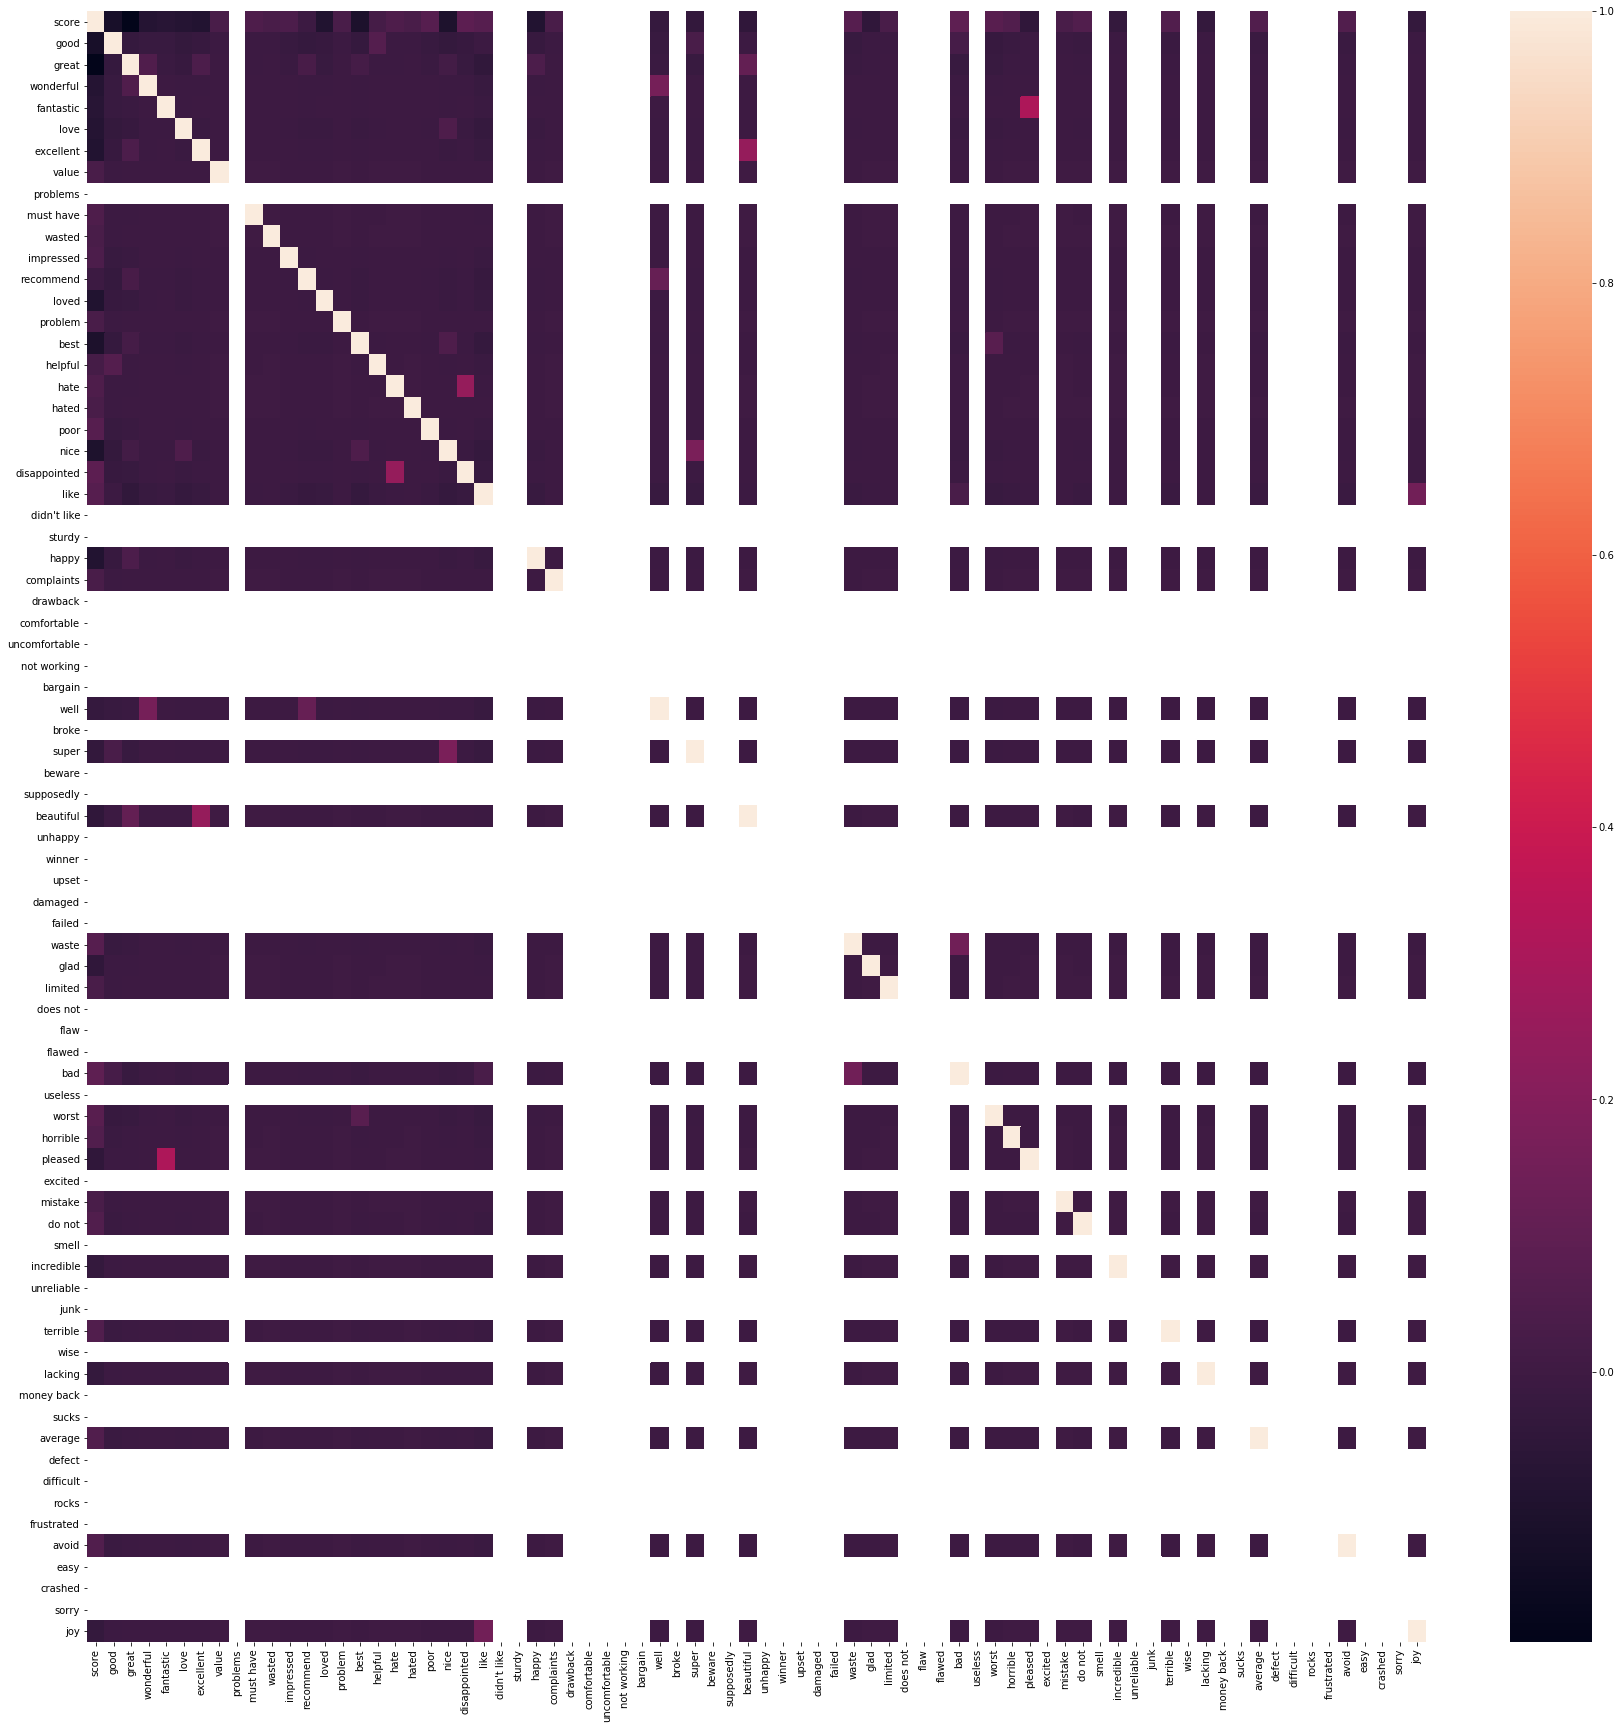

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(yelp_raw.corr())

In [26]:
data = yelp_raw[keywords + ['allcaps']]
target = yelp_raw['score']

In [27]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 360


In [28]:
yelp_raw['predict'] = y_pred

In [29]:
yelp_raw.head()

,sentence,score,good,great,wonderful,fantastic,love,excellent,value,problems,...,difficult,rocks,frustrated,avoid,easy,crashed,sorry,joy,allcaps,predict
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


brief writeup of your feature engineering and selection process
The feature engineering was based on keywords and all caps in the review messages. I do have questions to review with my mentor. Namely, I noted in both heatmaps that there are many examples of correlation between the variables (keywords).

*Would it be best to remove these keywords from the model?*

Although the model works better on the first (orignial) data set than on the second data set, it still has a good success rate on the second data set. 